In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
train_path = "DailyDelhiClimateTrain.csv"
test_path = "DailyDelhiClimateTest.csv"
train_data = pd.read_csv(train_path, parse_dates=["date"], index_col="date")
test_data = pd.read_csv(test_path, parse_dates=["date"], index_col="date")

In [4]:
data = pd.concat([train_data, test_data])

In [5]:
data['7-day MA'] = data['meantemp'].rolling(window=7).mean()
data['30-day MA'] = data['meantemp'].rolling(window=30).mean()

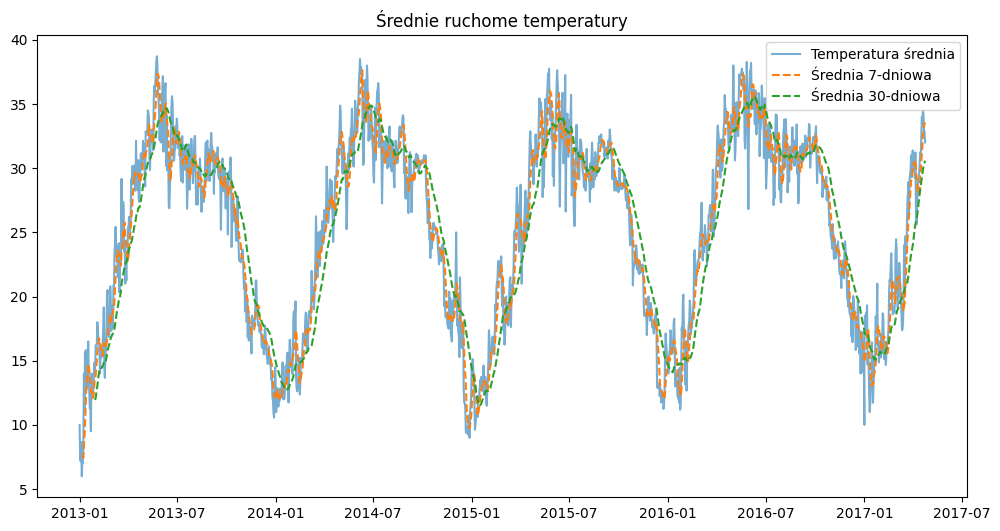

In [6]:
plt.figure(figsize=(12,6))
plt.plot(data['meantemp'], label='Temperatura średnia', alpha=0.6)
plt.plot(data['7-day MA'], label='Średnia 7-dniowa', linestyle='--')
plt.plot(data['30-day MA'], label='Średnia 30-dniowa', linestyle='--')
plt.legend()
plt.title("Średnie ruchome temperatury")
plt.show()

<Figure size 1200x500 with 0 Axes>

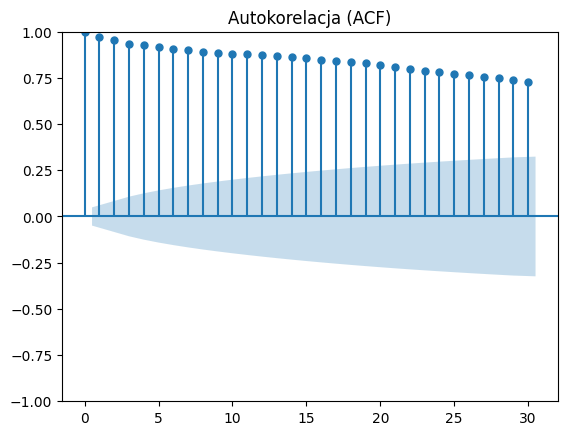

In [11]:
plt.figure(figsize=(12,5))
plot_acf(data['meantemp'].dropna(), lags=30)
plt.title("Autokorelacja (ACF)")
plt.show()

<Figure size 1200x500 with 0 Axes>

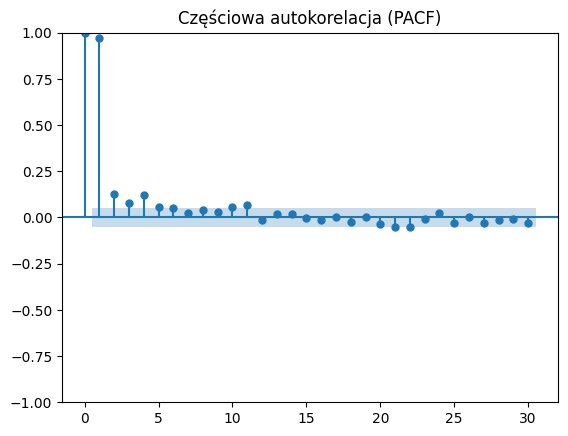

In [12]:
plt.figure(figsize=(12,5))
plot_pacf(data['meantemp'].dropna(), lags=30, method='ywm')
plt.title("Częściowa autokorelacja (PACF)")
plt.show()

In [13]:
decomposition = seasonal_decompose(data['meantemp'].dropna(), model='additive', period=365)

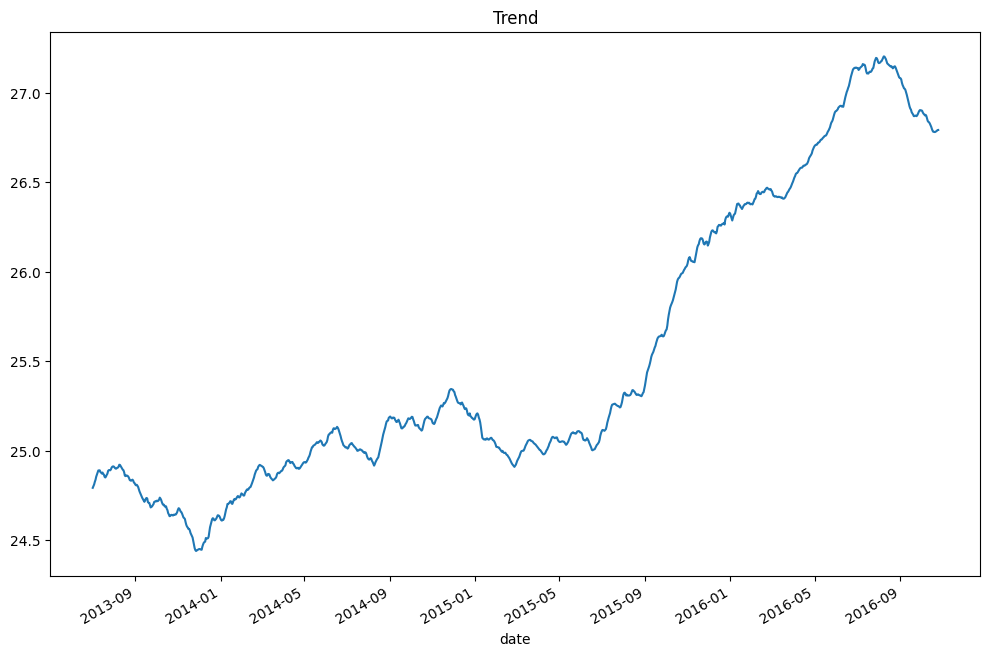

In [14]:
plt.figure(figsize=(12,8))
decomposition.trend.plot(title='Trend')
plt.show()

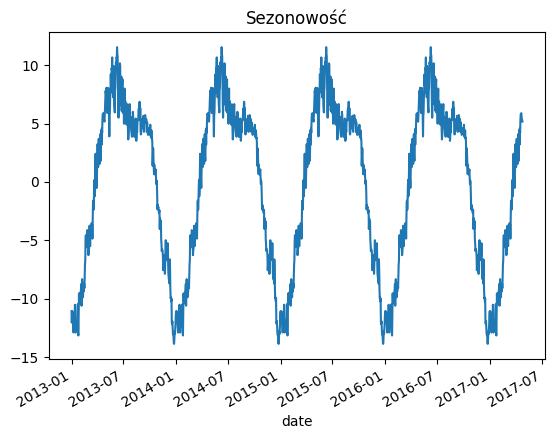

In [15]:
decomposition.seasonal.plot(title='Sezonowość')
plt.show()

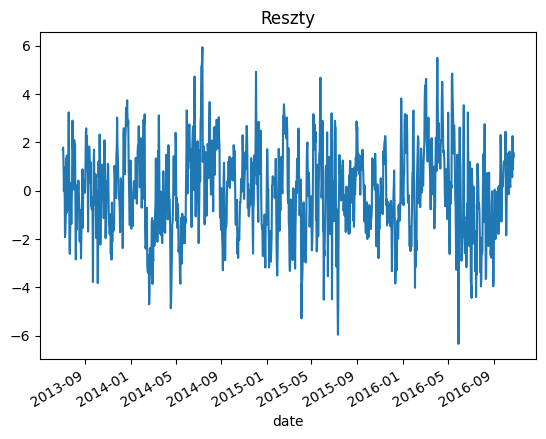

In [16]:
decomposition.resid.plot(title='Reszty')
plt.show()